## Lab 2
### Mrinal Bhan
#### *211020428, DSAI*

 ***Experiment 01:***
Write a program to perform Image Classification:
a) Use online image datasets.
b) Create a model using CNN and Transfer Learning
c) Train and evaluate.

In [ ]:
pip install tensorflow numpy mnist

In [3]:
import numpy as np
import mnist
from tensorflow import keras

train_images = mnist.train_images()
train_labels = mnist.train_labels()

print(train_images.shape) # (60000, 28, 28)
print(train_labels.shape) # (60000,)

(60000, 28, 28)
(60000,)


Label:  5


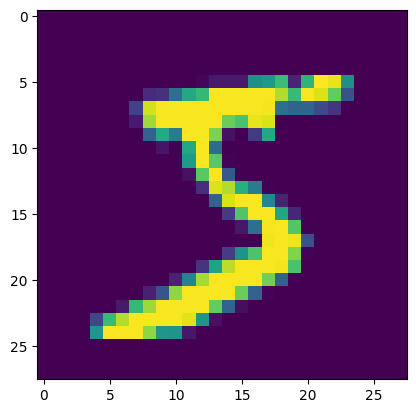

In [11]:
import matplotlib.pyplot as plt
plt.imshow(train_images[0,:,:])
print("Label: ",train_labels[0])

In [12]:
import numpy as np
import mnist

train_images = mnist.train_images()
train_labels = mnist.train_labels()
test_images = mnist.test_images()
test_labels = mnist.test_labels()

# Normalize the images.
train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

# Reshape the images.
train_images = np.expand_dims(train_images, axis=3)
test_images = np.expand_dims(test_images, axis=3)

print(train_images.shape) # (60000, 28, 28, 1)
print(test_images.shape)  # (10000, 28, 28, 1)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [13]:
from tensorflow.keras.models import Sequential

# WIP
model = Sequential([
  # layers...
])

In [14]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

num_filters = 8
filter_size = 3
pool_size = 2

model = Sequential([
  Conv2D(num_filters, filter_size, input_shape=(28, 28, 1)),
  Conv2D(num_filters, filter_size, input_shape=(26, 26, 1)),
  MaxPooling2D(pool_size=pool_size),
  Flatten(),
  Dense(100, activation='ReLU'),
  Dense(10,activation='softmax')
])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 8)         80        
                                                                 
 conv2d_4 (Conv2D)           (None, 24, 24, 8)         584       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 8)        0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1152)              0         
                                                                 
 dense_8 (Dense)             (None, 100)               115300    
                                                                 
 dense_9 (Dense)             (None, 10)                1010      
                                                      

In [15]:
model.compile(
  'adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 8)         80        
                                                                 
 conv2d_4 (Conv2D)           (None, 24, 24, 8)         584       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 8)        0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1152)              0         
                                                                 
 dense_8 (Dense)             (None, 100)               115300    
                                                                 
 dense_9 (Dense)             (None, 10)                1010      
                                                      

In [16]:
import mnist

train_labels = mnist.train_labels()
print(train_labels[0]) # 5
print(train_labels.shape)

5
(60000,)


In [17]:
from tensorflow.keras.utils import to_categorical

model.fit(
  train_images[0:int(len(train_images)/5)],
  to_categorical(train_labels[0:int(len(train_images)/5)]),
  epochs=1,
  validation_data=(test_images, to_categorical(test_labels)),
)

375/375 [==============================] - 5s 8ms/step - loss: 0.4184 - accuracy: 0.8788 - val_loss: 0.2156 - val_accuracy: 0.9388


In [18]:
# Predict on the first 5 test images.
predictions = model.predict(test_images)

# Print our model's predictions.
a=np.argmax(predictions, axis=1) # [7, 2, 1, 0, 4]
print(a)
# Check our predictions against the ground truths.
b=test_labels # [7, 2, 1, 0, 4]
print(b)
print(a-b)

313/313 [==============================] - 1s 2ms/step
[7 2 1 ... 4 5 6]
[7 2 1 ... 4 5 6]
[0 0 0 ... 0 0 0]


In [19]:
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(a,b)

print(cf_matrix)

[[ 964    0    4    1    1   11   12    2    9   11]
 [   0 1112    2    0    0    2    3    4    3    5]
 [   4    5  973   14    6    2    7   28    7    1]
 [   2    5   18  973    0   39    3   10   51   19]
 [   0    1    9    0  943    6    6   10    7   63]
 [   3    2    0    7    1  805    8    0    8    4]
 [   4    4    4    0   12   13  913    0    5    1]
 [   2    1   12    8    2    3    2  954    5   16]
 [   1    5    9    4    4    8    4    0  873   11]
 [   0    0    1    3   13    3    0   20    6  878]]


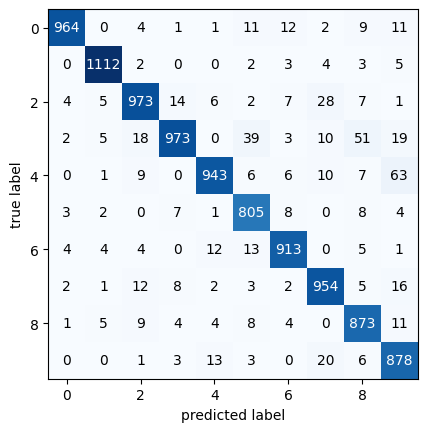

In [20]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=cf_matrix)
plt.show()

# ***Assignment 1: Basic Image Classification***
1.Dataset Exploration: Choose a simple image classification dataset (e.g., MNIST or Fashion-MNIST).
Write code to load and visualize the dataset.
2. Implementing a Basic Model: Build a simple neural network using libraries like TensorFlow or
PyTorch to classify the images. Train the model using the dataset and evaluate its accuracy.
3. Visualization of Model Results: Create a program to visualize the model&#39;s predictions on test images,
highlighting the correct and incorrect classifications.

11490434/11490434 [==============================] - 0s 0us/step


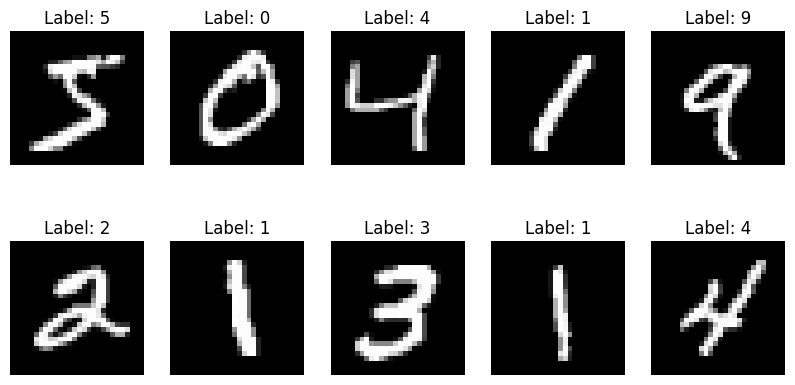

In [2]:
# Loading and Visualizing the Dataset
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Load the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the pixel values between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Visualize some sample images
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

In [3]:
#Build and Train a Basic Neural Network Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

# Build the model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=8, batch_size=32, validation_split=0.2)

Epoch 1/8
1500/1500 [==============================] - 11s 3ms/step - loss: 0.2851 - accuracy: 0.9182 - val_loss: 0.1559 - val_accuracy: 0.9557
Epoch 2/8
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1251 - accuracy: 0.9629 - val_loss: 0.1218 - val_accuracy: 0.9654
Epoch 3/8
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0862 - accuracy: 0.9743 - val_loss: 0.0944 - val_accuracy: 0.9725
Epoch 4/8
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0631 - accuracy: 0.9812 - val_loss: 0.0908 - val_accuracy: 0.9729
Epoch 5/8
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0476 - accuracy: 0.9860 - val_loss: 0.0869 - val_accuracy: 0.9747
Epoch 6/8
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0374 - accuracy: 0.9894 - val_loss: 0.0957 - val_accuracy: 0.9743
Epoch 7/8
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0300 - accuracy: 0.9910 - val_loss: 0.0883 - val_accuracy: 0.975

313/313 [==============================] - 1s 1ms/step


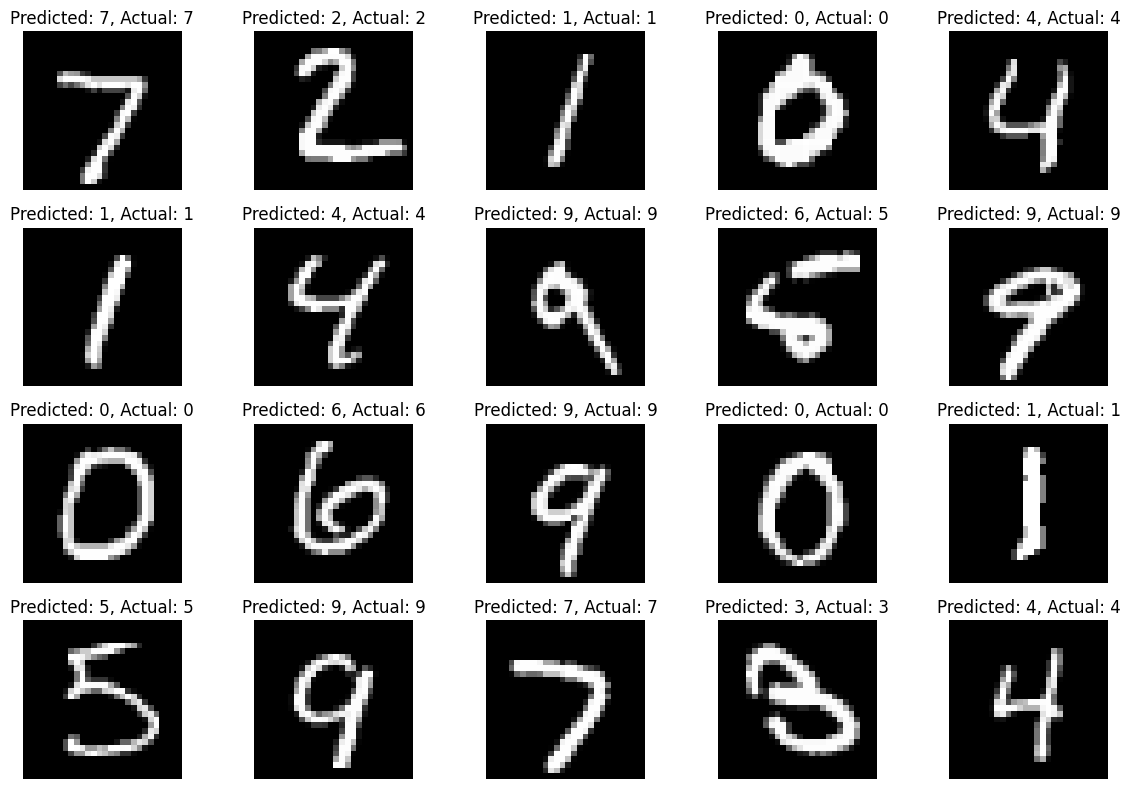

In [4]:
#Visualize Model Results
import numpy as np

# Make predictions on test images
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)

# Visualize the results
plt.figure(figsize=(12, 8))
for i in range(20):
    plt.subplot(4, 5, i+1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"Predicted: {predicted_labels[i]}, Actual: {y_test[i]}")
    if predicted_labels[i] == y_test[i]:
        plt.xlabel("Correct", color='green')
    else:
        plt.xlabel("Incorrect", color='red')
    plt.axis('off')
plt.tight_layout()
plt.show()

# ***Assignment 2: Convolutional Neural Networks (CNNs)***
1. CNN Model Construction: Implement a CNN architecture using layers like convolutional, pooling,
and fully connected layers. Experiment with different layer configurations.
2. Data Augmentation: Augment the training dataset by applying transformations like rotation,
cropping, and flipping. Train the CNN model with augmented data and compare its performance.
3. Transfer Learning: Use a pre-trained CNN model (e.g., VGG16, ResNet) and fine-tune it for your
image classification task. Compare the performance with your custom-built model.


In [5]:
#CNN Model Construction
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Build the CNN model
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 flatten_1 (Flatten)         (None, 1152)             

In [6]:
#Data Augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=False,
    fill_mode='nearest'
)

# Fit the generator on the training data
datagen.fit(x_train.reshape((-1, 28, 28, 1)))

# Train the model with augmented data
cnn_model.fit(datagen.flow(x_train.reshape((-1, 28, 28, 1)), y_train, batch_size=32),
              epochs=5, validation_data=(x_test.reshape((-1, 28, 28, 1)), y_test))

Epoch 1/5
1875/1875 [==============================] - 33s 13ms/step - loss: 0.8669 - accuracy: 0.6994 - val_loss: 0.1741 - val_accuracy: 0.9446
Epoch 2/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.3510 - accuracy: 0.8903 - val_loss: 0.0998 - val_accuracy: 0.9692
Epoch 3/5
1875/1875 [==============================] - 25s 14ms/step - loss: 0.2513 - accuracy: 0.9247 - val_loss: 0.1136 - val_accuracy: 0.9641
Epoch 4/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2075 - accuracy: 0.9387 - val_loss: 0.0710 - val_accuracy: 0.9793
Epoch 5/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1820 - accuracy: 0.9461 - val_loss: 0.0637 - val_accuracy: 0.9794


In [8]:
#Transfer Learning
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.utils import to_categorical

# Resize MNIST images to (224, 224) and convert to RGB
x_train_rgb = np.repeat(x_train.reshape((-1, 28, 28, 1)), 3, axis=-1)
x_test_rgb = np.repeat(x_test.reshape((-1, 28, 28, 1)), 3, axis=-1)

# Convert labels to one-hot encoding
y_train_onehot = to_categorical(y_train, num_classes=10)
y_test_onehot = to_categorical(y_test, num_classes=10)

# Load the pre-trained VGG16 model (excluding top layers)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom classification layers
transfer_model = Sequential([
    tf.keras.layers.Lambda(lambda image: tf.image.resize(image, (224, 224))),
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the transfer model
transfer_model.compile(optimizer=Adam(learning_rate=0.0001),
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

# Fine-tune the model
transfer_model.fit(datagen.flow(x_train_rgb, y_train_onehot, batch_size=32),
                   epochs=3, validation_data=(x_test_rgb, y_test_onehot))


Epoch 1/3
1875/1875 [==============================] - 782s 415ms/step - loss: 0.4644 - accuracy: 0.8413 - val_loss: 0.0612 - val_accuracy: 0.9811
Epoch 2/3
1875/1875 [==============================] - 773s 412ms/step - loss: 0.1169 - accuracy: 0.9661 - val_loss: 0.0621 - val_accuracy: 0.9830
Epoch 3/3
1875/1875 [==============================] - 772s 411ms/step - loss: 0.0922 - accuracy: 0.9740 - val_loss: 0.0535 - val_accuracy: 0.9852


# ***Assignment 3: Advanced Image Classification Techniques***
1. Hyperparameter Tuning: Experiment with hyperparameter tuning techniques like grid search or
random search to find the optimal set of hyperparameters for your image classification model.
2. Model Interpretability: Implement techniques to interpret and visualize the learned features in your
CNN model, such as feature maps, activation maximization, or Grad-CAM.
3. Ensemble Methods: Build an ensemble of multiple image classification models (e.g., CNN, SVM,
Random Forest) and combine their predictions to improve classification accuracy.

In [24]:
#hyperparameter
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# Filter images and labels for digits 0 and 1
train_mask = (train_labels == 0) | (train_labels == 1)
test_mask = (test_labels == 0) | (test_labels == 1)

train_images_filtered = train_images[train_mask]
train_labels_filtered = train_labels[train_mask]

test_images_filtered = test_images[test_mask]
test_labels_filtered = test_labels[test_mask]

train_images_filtered = train_images_filtered.reshape((len(train_images_filtered), 28, 28, 1))
test_images_filtered = test_images_filtered.reshape((len(test_images_filtered), 28, 28, 1))

train_images_filtered = train_images_filtered.astype('float32') / 255
test_images_filtered = test_images_filtered.astype('float32') / 255


In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the CNN model as a function for use with scikit-learn
def create_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(2, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Hyperparameter grid for grid search
param_grid = {
    'epochs': [3, 5, 7],
    'batch_size': [32, 64, 128]
}

# Perform grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_search.fit(train_images_filtered[0:int(len(train_images_filtered)/20)], train_labels_filtered[0:int(len(train_images_filtered)/20)])

# Print the best parameters
print("Best parameters:", grid_search.best_params_)


1/1 [==============================] - 8s 8s/step


ValueError: ignored

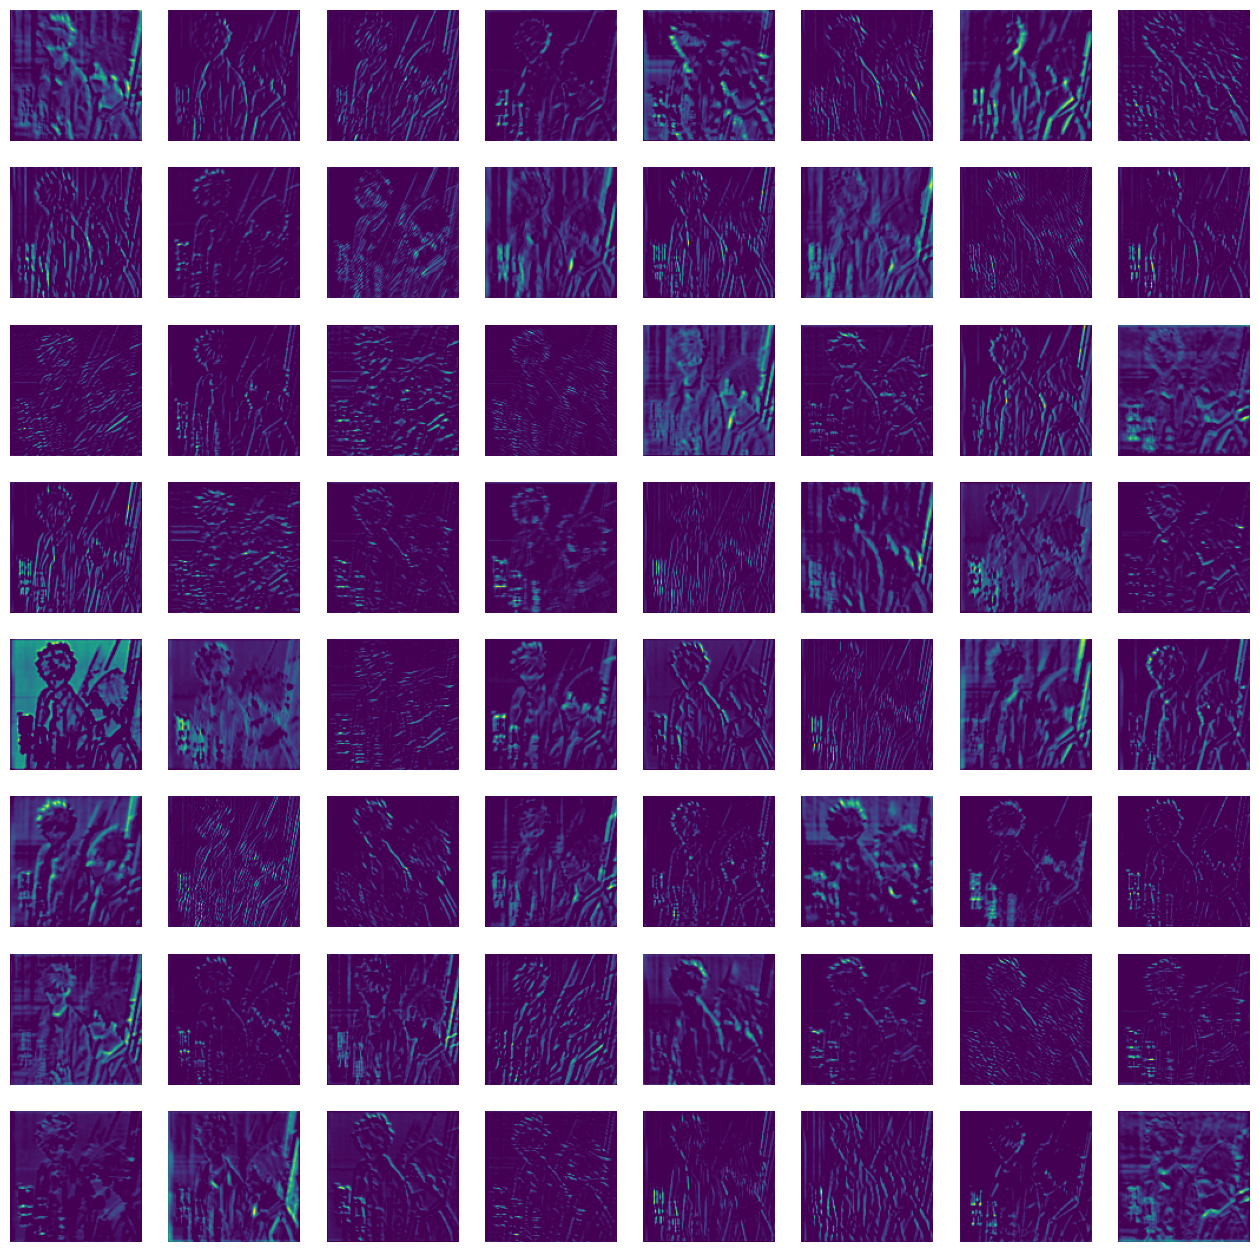

In [3]:
#feature map
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Load the VGG16 model with pre-trained weights (or use your own model)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Choose a layer index to visualize
layer_index = 5  # Change this to the desired layer index

# Create a model to extract feature maps from the chosen layer
feature_map_model = Model(inputs=base_model.input, outputs=base_model.layers[layer_index].output)

# Load and preprocess the image
img_path = '/content/Wow.jpg'
img = load_img(img_path, target_size=(224, 224))
img = img_to_array(img)
img = preprocess_input(img)
img = np.expand_dims(img, axis=0)

# Get the feature maps for the chosen layer
feature_maps = feature_map_model.predict(img)

# Plot the feature maps
plt.figure(figsize=(16, 16))
for i in range(feature_maps.shape[-1]):
    plt.subplot(8, 8, i+1)
    plt.imshow(feature_maps[0, :, :, i], cmap='viridis')
    plt.axis('off')
plt.show()


In [41]:
#ensemble
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC

# Create individual models
rf_model = RandomForestClassifier()
svm_model = SVC(probability=True)

# Create an ensemble model with majority vote
ensemble_model = VotingClassifier(estimators=[('rf', rf_model), ('svm', svm_model)], voting='soft')
ensemble_model.fit(X_train, y_train)

# Evaluate the ensemble model
accuracy = ensemble_model.score(X_test, y_test)
print("Ensemble Model Accuracy:", accuracy)


Ensemble Model Accuracy: 0.9996052112120016


# ***Assignment 4: Transfer Learning and Fine-Tuning***
1. Dataset Preprocessing: Choose a more complex image dataset (e.g., CIFAR-10 or ImageNet).
Preprocess the dataset by resizing, normalizing, and splitting into training and validation sets.
2. Transfer Learning with Pre-trained Models: Utilize pre-trained models like ResNet, Inception, or
EfficientNet for your dataset. Freeze certain layers, fine-tune others, and train the model.
3. Visualizing Transfer Learning Impact: Visualize the performance improvement obtained from transfer
learning compared to training a model from scratch.

In [26]:
#Dataset Preprocessing:
import tensorflow as tf

# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

# Normalize pixel values to [0, 1]
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

# Split into training and validation sets
validation_split = 0.2
num_train_samples = int(len(train_images) * (1 - validation_split))

train_images, val_images = train_images[:num_train_samples], train_images[num_train_samples:]
train_labels, val_labels = train_labels[:num_train_samples], train_labels[num_train_samples:]

170498071/170498071 [==============================] - 3s 0us/step


In [27]:
#Transfer Learning with Pre-trained Models:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model

# Load the pre-trained ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top of the pre-trained model
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(256, activation='relu')(x)
output = Dense(10, activation='softmax')(x)

# Create the new model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_images[0:int(len(train_images)/3)], train_labels[0:int(len(train_labels)/3)], epochs=5, batch_size=32,
                    validation_data=(val_images, val_labels))

94765736/94765736 [==============================] - 1s 0us/step
Epoch 1/5
417/417 [==============================] - 18s 33ms/step - loss: 2.2266 - accuracy: 0.1887 - val_loss: 2.0735 - val_accuracy: 0.2584
Epoch 2/5
417/417 [==============================] - 11s 27ms/step - loss: 2.0378 - accuracy: 0.2446 - val_loss: 1.9648 - val_accuracy: 0.2743
Epoch 3/5
417/417 [==============================] - 10s 23ms/step - loss: 1.9600 - accuracy: 0.2767 - val_loss: 1.9191 - val_accuracy: 0.2899
Epoch 4/5
417/417 [==============================] - 10s 25ms/step - loss: 1.9295 - accuracy: 0.2910 - val_loss: 1.9125 - val_accuracy: 0.3006
Epoch 5/5
417/417 [==============================] - 9s 23ms/step - loss: 1.9017 - accuracy: 0.3023 - val_loss: 1.8813 - val_accuracy: 0.3116


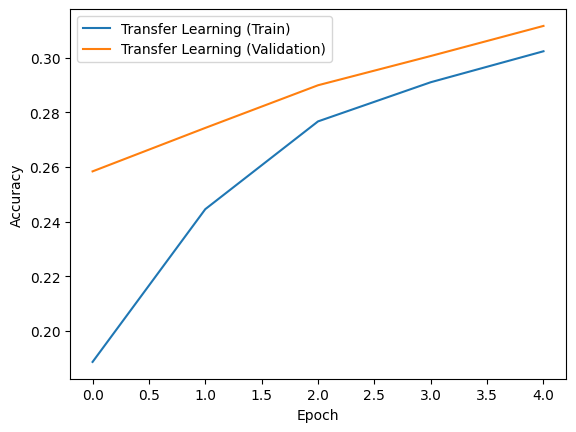

In [28]:
#Visualizing Transfer Learning Impact:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Transfer Learning (Train)')
plt.plot(history.history['val_accuracy'], label='Transfer Learning (Validation)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# ***Assignment 5: Handling Imbalanced Datasets***
1. Dataset Imbalance Analysis: Choose a dataset with class imbalance. Analysed the distribution of
classes and determined the severity of the imbalance.
2. Data Augmentation for Imbalanced Data: Implement specific data augmentation techniques like
Synthetic Minority Over-sampling Technique (SMOTE) to balance the dataset and train the model.
3. Evaluation Metrics for Imbalanced Data: Evaluate your model using metrics like precision, recall,
F1-score, and area under the ROC curve (AUC) that are suitable for imbalanced datasets.

In [5]:
# Create a binary classification problem (0s and 1s)
digit_0_indices = np.where(y_train == 0)[0]
digit_1_indices = np.where(y_train == 1)[0]
imbalance_ratio = 9  # Artificially creating a 1:9 imbalance ratio
selected_indices = np.concatenate((digit_0_indices, digit_1_indices[:imbalance_ratio * len(digit_0_indices)]))
X_selected = X_train[selected_indices]
y_selected = y_train[selected_indices]

In [6]:
# Reshape images to 1D vectors
X_selected = X_selected.reshape(X_selected.shape[0], -1)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_selected, test_size=0.2, random_state=42)

In [7]:
# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train a Random Forest classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate and print the classification report
class_report = classification_report(y_test, y_pred)

RandomForestClassifier(random_state=42)

In [9]:
print("Classification Report:")
print(class_report)

# Calculate and print the ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred)
print(f'ROC AUC Score: {roc_auc:.2f}')

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1226
           1       1.00      1.00      1.00      1307

    accuracy                           1.00      2533
   macro avg       1.00      1.00      1.00      2533
weighted avg       1.00      1.00      1.00      2533

ROC AUC Score: 1.00
